# Introduction to high-level tensorflow 2.0 using keras
(adapted from https://www.tensorflow.org/tutorials/quickstart/beginner).

In [0]:
# get tensorflow 2.0 (run once per session)
pip install tensorflow==2.0

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.0.0


In [15]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # customary normalization to [0, 1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Simple, one-layer, fully-connected neural network

In [0]:
# define the sequential model (i.e., each layer follows sequentially from the previous)
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # fully-connected, so flatten the image
    tf.keras.layers.Dense(units=128, activation='relu'),  # hidden layer has 128 units
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

simple_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [17]:
# train model and track validation loss after each epoch:
simple_model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2605 - accuracy: 0.9258 - val_loss: 0.1441 - val_accuracy: 0.9567
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1148 - accuracy: 0.9657 - val_loss: 0.0908 - val_accuracy: 0.9741
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0797 - accuracy: 0.9761 - val_loss: 0.0850 - val_accuracy: 0.9747
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0590 - accuracy: 0.9817 - val_loss: 0.0766 - val_accuracy: 0.9759
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.0799 - val_accuracy: 0.9752


In [18]:
# let's examine some sample predictions:
prediction = simple_model.predict_classes(x_test)

# incorrect predictions:
incorrect = prediction != y_test
incorrect_indices = np.where(incorrect)[0]
print('error rate = ' + str(np.mean(incorrect)))  # should be 1 - val_accuracy
print('These are the indices corresponding to the test samples that our model got wrong:')
print(incorrect_indices)

error rate = 0.0248
These are the indices corresponding to the test samples that our model got wrong:
[   8   18  247  321  340  381  445  447  495  582  610  613  619  628
  691  717  740  844  877  882  947  951  956  965  992 1003 1014 1039
 1107 1112 1128 1178 1182 1226 1232 1242 1247 1260 1289 1299 1319 1393
 1414 1425 1500 1522 1527 1530 1549 1553 1601 1609 1621 1637 1670 1678
 1681 1709 1717 1790 1813 1828 1878 1901 1909 1984 2004 2018 2024 2035
 2040 2043 2053 2098 2109 2118 2135 2182 2266 2272 2293 2369 2387 2414
 2426 2488 2525 2573 2582 2589 2597 2648 2654 2769 2810 2854 2877 2927
 2939 3060 3073 3102 3115 3117 3225 3503 3520 3558 3559 3597 3618 3718
 3749 3751 3780 3796 3808 3811 3818 3850 3853 3869 3893 3902 3906 3941
 3985 4065 4176 4199 4201 4224 4248 4289 4300 4306 4314 4355 4360 4369
 4425 4437 4443 4497 4504 4534 4536 4567 4601 4731 4761 4807 4814 4823
 4879 4880 4943 4956 4963 4989 4990 5140 5176 5209 5210 5331 5457 5600
 5642 5676 5734 5749 5842 5887 5936 5937 5955 

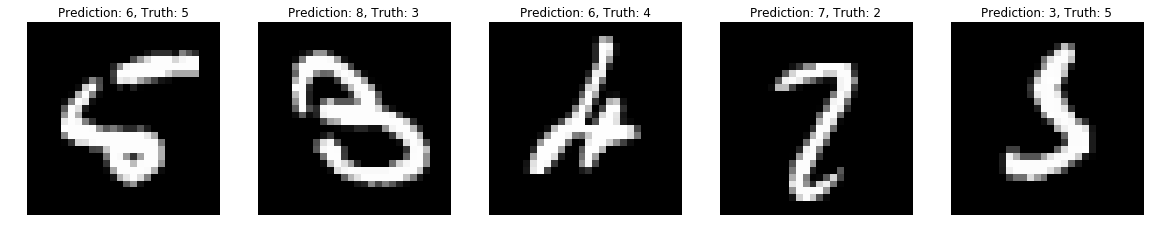

In [19]:
# plot 5 examples of wrong classifications:
plt.figure(figsize=(20, 5))
for i, i_wrong in enumerate(incorrect_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test[i_wrong], cmap='gray')
  plt.title('Prediction: ' + str(prediction[i_wrong]) + ', Truth: ' + str(y_test[i_wrong]))
  plt.axis('off')
plt.show()

## Convolutional neural network example

In [0]:
# because we're using CNNs, the data needs a channel dimension:
x_train = x_train[..., None]
x_test = x_test[..., None]

In [0]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    # now, let's transition into a fully-connected layer; first, we flatten:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [24]:
# train model and track validation loss after each epoch:
cnn_model.fit(x_train, y_train,
              epochs=2,
              batch_size=32,
              validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1449 - accuracy: 0.9567 - val_loss: 0.0614 - val_accuracy: 0.9794
Epoch 2/2
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0541 - val_accuracy: 0.9839


In [28]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            multiple                  320       
_________________________________________________________________
conv2d_5 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten_4 (Flatten)          multiple                  0         
_________________________________________________________________
dense_8 (Dense)              multiple                  401472    
_________________________________________________________________
dense_9 (Dense)              multiple                  650       
Total params: 411,690
Trainable params: 411,690
Non-trainable params: 0
_________________________________________________________________
